In [7]:
import pandas as pd
from rdkit import Chem

In [37]:
data = pd.read_json("../data/bengio2021_fragments_105.json")

In [38]:
u_data = data.drop_duplicates(subset=["block_smi"])

In [19]:
frags_smi = u_data["block_smi"]


In [20]:
frags_mol = [Chem.MolFromSmiles(i) for i in frags_smi]

In [21]:
frags_stems_auto = [[
            atom_idx for atom_idx in range(m.GetNumAtoms()) if m.GetAtomWithIdx(atom_idx).GetTotalNumHs() > 0
        ] for m in frags_mol]

In [22]:
frags_stems_auto

[[0, 1, 2, 3, 4, 5],
 [0, 1],
 [0],
 [0, 1, 2, 3, 4, 5],
 [0],
 [0],
 [0, 1, 2, 4, 5],
 [0, 1, 2],
 [0, 1],
 [1, 2, 3],
 [1, 2],
 [0, 1, 2],
 [0, 1, 2, 4, 5, 6, 7, 9],
 [0, 1],
 [0, 1, 2, 3, 4],
 [0, 1],
 [0],
 [0],
 [0, 1, 2],
 [2],
 [0],
 [0, 1, 2, 4],
 [0, 2, 5, 6],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 4, 5, 6, 8],
 [0, 1, 3, 4, 5],
 [0, 1, 2, 3, 4, 5],
 [0, 1, 2],
 [0, 1, 3],
 [],
 [0, 1, 2, 3, 4],
 [0, 1, 3, 4],
 [1],
 [1],
 [0, 1, 2, 4],
 [1, 2, 3],
 [0],
 [0, 1, 2, 3],
 [0],
 [2, 3, 6, 7],
 [0, 1, 3],
 [0, 1, 3, 5],
 [0],
 [0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 5],
 [0, 1, 2],
 [0, 1],
 [0, 1, 2, 4, 5],
 [0, 1, 2, 3],
 [0, 1],
 [0, 1, 2],
 [0, 2],
 [0],
 [0, 1],
 [2, 3, 4, 7],
 [0, 1, 2, 3, 4, 5],
 [0, 1, 2],
 [0, 1],
 [1, 3],
 [0, 1],
 [0, 2, 3],
 [0, 1],
 [1],
 [3, 4, 5, 6],
 [1],
 [0, 1, 2, 3, 4, 5],
 [2, 3, 7, 8, 9, 10],
 [],
 [1, 3],
 [4, 6, 7, 8, 9, 15],
 [0, 1],
 [0, 1, 3, 4, 5]]

In [23]:
frags_stems_man = u_data["block_r"]

In [24]:
frags_stems_man

0      [0, 1, 2, 3, 4, 5]
1                  [0, 1]
3                     [0]
4                  [0, 3]
7                     [0]
              ...        
98                    [1]
99                    [1]
100             [8, 4, 7]
103                   [1]
104                   [5]
Name: block_r, Length: 72, dtype: object

In [32]:
[[
            atom_idx for atom_idx in range(m.GetNumAtoms()) if m.GetAtomWithIdx(atom_idx).GetTotalNumHs() > 0
        ] for m in [frags_mol[3]]]

[[0, 1, 2, 3, 4, 5]]

In [48]:
Chem.MolToSmiles(frags_mol[2])

'C=O'

In [44]:
u_data

,block_name,block_smi,block_r
0,c1ccccc1_0,c1ccccc1,"[0, 1, 2, 3, 4, 5]"
1,CO_0,CO,"[0, 1]"
3,C=O_0,C=O,[0]
4,C1CCNCC1_0,C1CCNCC1,"[0, 3]"
7,O_0,O,[0]
...,...,...,...
98,O=P[O-]_2,O=P[O-],[1]
99,O=[PH]([O-])O_3,O=[PH]([O-])O,[1]
100,O=c1nc2[nH]c3ccccc3nc-2c(=O)[nH]1_2,O=c1nc2[nH]c3ccccc3nc-2c(=O)[nH]1,"[8, 4, 7]"
103,C[SH2+]_1,C[SH2+],[1]


In [54]:
u_data["block_r"].reset_index(drop=True).to_csv("../data/bengio2021_stems_72.txt", header=None, index=False)

In [65]:
x = pd.read_csv("../data/bengio2021_stems_72.txt", header=None)

In [66]:
eval(x[0][0])

[0, 1, 2, 3, 4, 5]

In [96]:
import numpy as np
list((map(lambda y: eval(y[0]), x.values)))

[[0, 1, 2, 3, 4, 5],
 [0, 1],
 [0],
 [0, 3],
 [0],
 [0],
 [0, 1, 2, 4, 5],
 [0, 2],
 [0, 1],
 [1],
 [1],
 [1],
 [0],
 [0, 1],
 [0],
 [0, 1, 1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0, 4, 1, 2, 4],
 [2, 6],
 [0],
 [6],
 [5],
 [0, 1, 2, 3, 4, 5],
 [1],
 [0, 3],
 [1],
 [0, 3, 4],
 [0, 1, 3, 4],
 [1],
 [1],
 [2, 4],
 [1],
 [0],
 [1],
 [0],
 [3, 6],
 [0],
 [0, 1, 3, 5],
 [0],
 [2, 5],
 [1, 3],
 [0],
 [0, 1],
 [0, 1, 2, 4, 5],
 [1],
 [1],
 [1],
 [2],
 [0],
 [1],
 [2, 4],
 [0, 2],
 [0, 1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [3, 6],
 [1],
 [0],
 [3, 8],
 [1],
 [1],
 [8, 4, 7],
 [1],
 [5]]

In [97]:
mx = Chem.MolFromSmiles("CC(C)C[NH3+](C)(c1ccsc1)(O(=C[O-])c1(C2=CCCCC2)ccccc1)c1(I)nc2cncnc2[nH]1")

[01:16:56] Explicit valence for atom # 4 N, 7, is greater than permitted


In [104]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [106]:
mxx = Chem.MolFromSmiles("CCC")

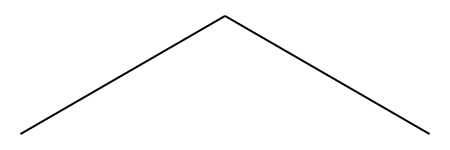

In [107]:
mxx

In [108]:
mx